#                                                        DIAMOND PRICE PREDICTION
                           
                                 

#                            
                            Machine Learning
                                (CSE4036)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("G:\\VIT SEM\\vit sems\\COURSES\\5th sem\\ml\\project\\diamonds (1).csv")
display(data.head(5))

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


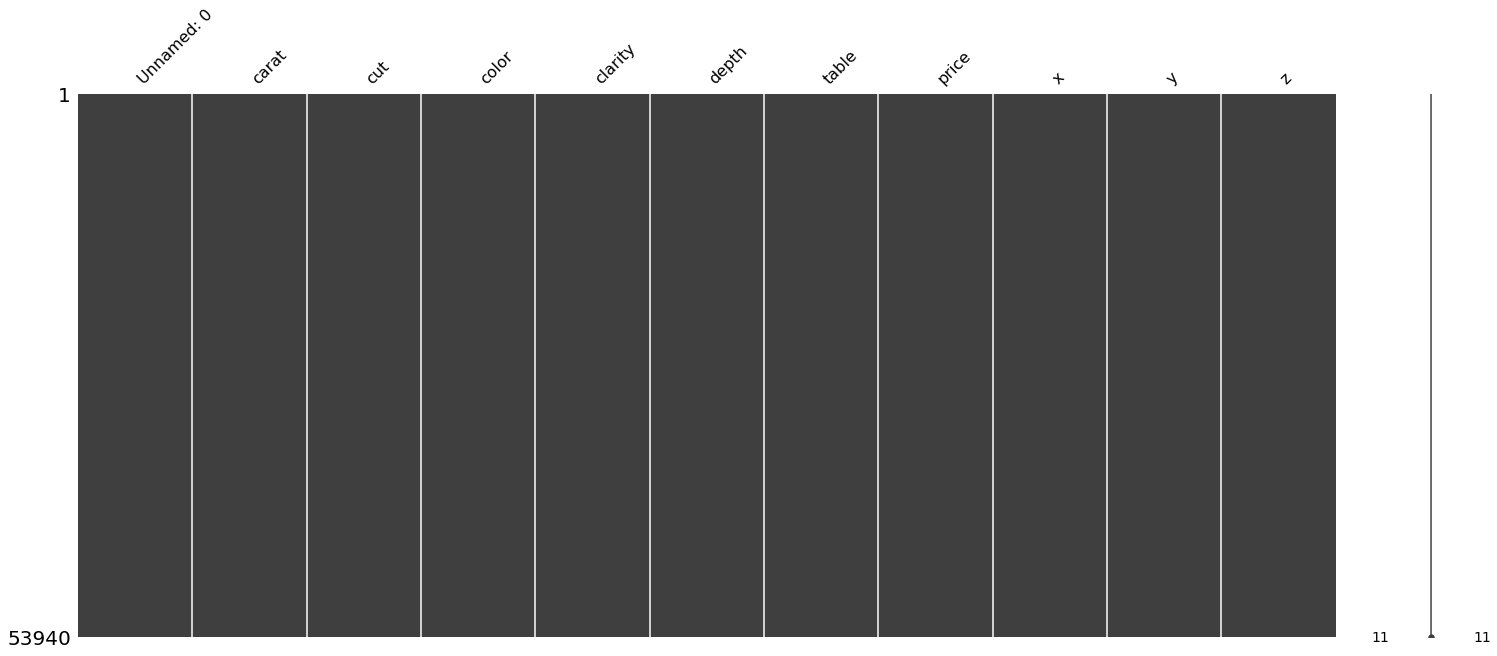

(53940, 11)


In [3]:
import missingno as msn
print(data.isnull().sum())
msn.matrix(data)
plt.show()
print(data.shape)

In [4]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data = data.drop(["Unnamed: 0"], axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


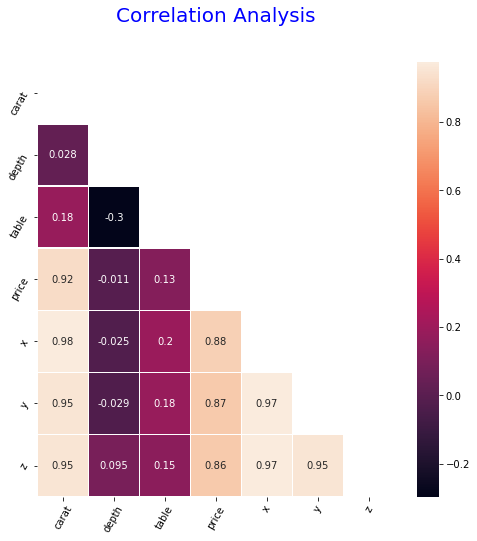

In [7]:
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='blue',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

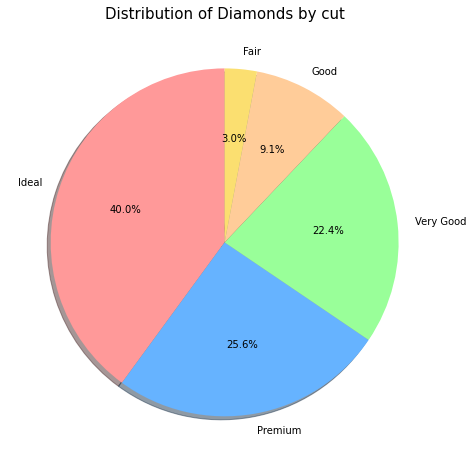

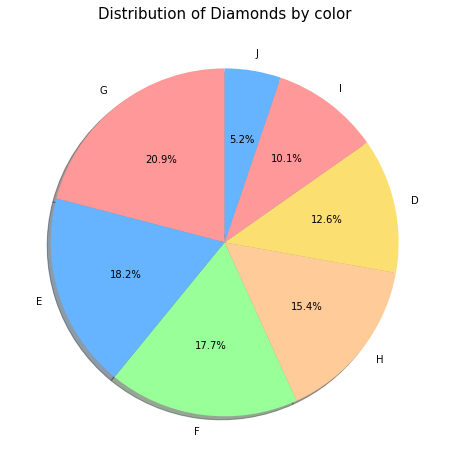

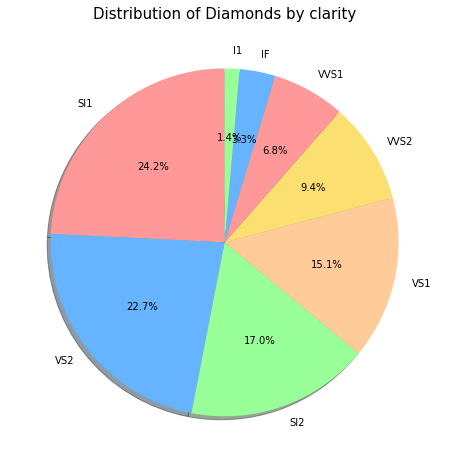

In [8]:
def pie_plot(data, col):
    labels = data[col].value_counts().index
    sizes = data[col].value_counts().values
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70']

    plt.figure(figsize = (8,8))
    plt.pie(sizes, labels=labels, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    title=f"Distribution of Diamonds by {col}"
    plt.title(title, color = 'black', fontsize = 15)
for col in object_cols:
    pie_plot(data, col)

In [9]:
linear_vars = data.select_dtypes(include=[np.number]).columns
display(list(linear_vars))

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [10]:
data.shape

(53940, 10)

In [11]:
def databoxplot(data, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        data.boxplot(column=listvar[counter], ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
    plt.show()
print(data.head(5))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


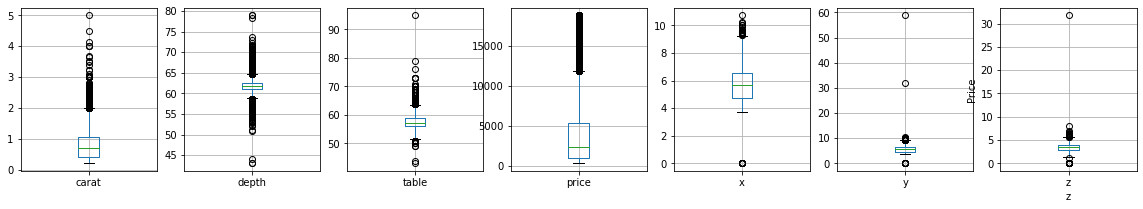

In [12]:
databoxplot(data, linear_vars)

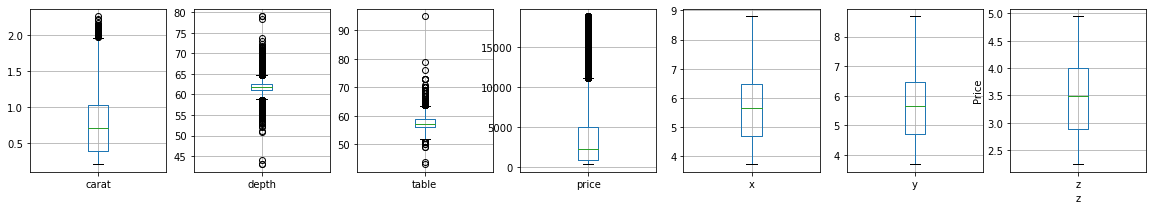

In [13]:
def removeoutliers(data, listvars, z):
    from scipy import stats
    for var in listvars:
        data1 = data[np.abs(stats.zscore(data[var])) < z]
    return data1
  
data = removeoutliers(data, linear_vars,2)
databoxplot(data, linear_vars)

In [14]:
data.shape

(52140, 10)

In [15]:
display(data.head(5))
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

data2=data[['cut', 'price']]
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335


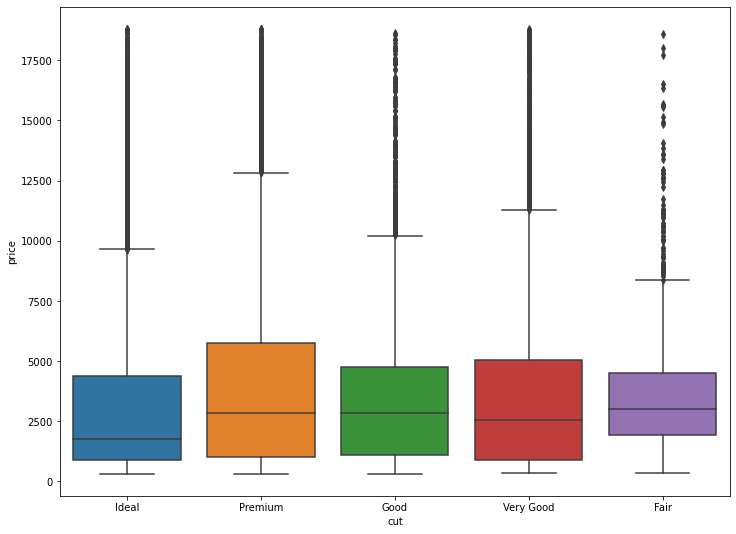

In [16]:
plt.figure(figsize=(12,9))
sns.boxplot(x='cut', y='price', data=data2)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
def convert_catg(data1):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    object_cols = list(data1.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(data1.columns.get_loc(col))
        for i in object_cols_ind:
            data1.iloc[:,i] = le.fit_transform(data1.iloc[:,i])

In [18]:
convert_catg(data)
print(data.head(5))

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


In [19]:
y=data['price']
y.head(5)

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [20]:
x=data.drop(['price', 'x', 'y', 'z'], axis=1)
x.head(5)

,carat,cut,color,clarity,depth,table
0,0.23,2,1,3,61.5,55.0
1,0.21,3,1,2,59.8,61.0
2,0.23,1,1,4,56.9,65.0
3,0.29,3,5,5,62.4,58.0
4,0.31,1,6,3,63.3,58.0


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [22]:
len(x_train)

41712

In [23]:
len(y_test)

10428

In [24]:
len(data)

52140

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [26]:
#lr
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
lrm=r2_score(y_test,pred)*100
print(lrm)

86.75964704257704


In [28]:
#dtr
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1=reg.predict(x_test)

In [29]:
dtr=r2_score(y_test,pred1)*100
print(dtr)

96.61109988248813


In [30]:
#rfr
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

In [31]:
rfr=r2_score(y_test,pred2)*100
print(rfr)

98.05411559433279


In [32]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)

In [33]:
knnr=r2_score(y_test,pred3)*100
print(knnr)

95.43984872258227


In [34]:
print("LinearRegression model",lrm)
print("Decision Tree regressor model",dtr)
print("RandomForest Regressor model",rfr)
print("K-Neighbors Regressor Algorithm",knnr)


LinearRegression model 86.75964704257704
Decision Tree regressor model 96.61109988248813
RandomForest Regressor model 98.05411559433279
K-Neighbors Regressor Algorithm 95.43984872258227


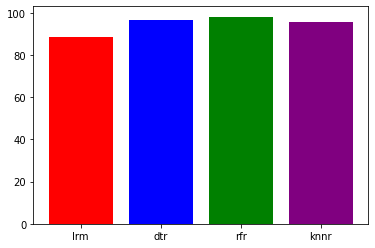

In [35]:
method = ['lrm','dtr','rfr','knnr']
accuracy = [88.65,96.89,98.22,95.48]
plt.bar(method,accuracy)
newcolours=["red","blue","green","purple"]
plt.bar(method,accuracy,color=newcolours)
plt.show()

In [36]:
def prediction():
    carat = (input("Enter the value of carat:"))
    cut =   int(input("Enter the value of cut:"))
    claraity = int(input("Enter the value of claraity:"))
    color = int(input("Enter the value of color:"))
    depth = int(input("Enter the value of Depth:"))
    table = int(input("Enter the value of table:"))
    price = rf.predict([[carat,cut,claraity,color,depth,table]])
    print('Approx Price of diamomnd is :',price,'$')
    
predi = prediction()
predi

Enter the value of carat:0.23
Enter the value of cut:1
Enter the value of claraity:2
Enter the value of color:4
Enter the value of Depth:45
Enter the value of table:35
Approx Price of diamomnd is : [2250.02] $


In [37]:
import tkinter.messagebox
from tkinter import *
from tkinter import messagebox
import customtkinter

customtkinter.set_appearance_mode("System")
customtkinter.set_default_color_theme("blue")

window = customtkinter.CTk()
window.config(bg='lightblue')
window.title('Diamond Prediction')
window.geometry("500x500+10+10")

def prediction(carat,cut,claraity,color,depth,table):
    price = rf.predict([[carat,cut,claraity,color,depth,table]])
    print('Approx Price of diamomnd is :',price,'$')
    return price
c = Canvas(window, bg="lightblue", height="400", width="400", highlightthickness=1, highlightbackground="lightblue")
c.place(relx=0.5, rely=0.5, anchor=CENTER)

head = Label(window, text="Diamond Prediction", font=('Aerial 17 bold italic'))
head.config(foreground='black', bg="lightblue")
head.pack()

lab1 = Label(c, text="Diamond Carat", font=('Aerial 17 bold italic'), bg="lightblue")
lab1.pack(pady=4)
val1 = Entry(c, text="Enter Carat", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
val1.pack(pady=4)
lab2 = Label(c, text="Diamond Cut", font=('Aerial 17 bold italic'), bg="lightblue")
lab2.pack(pady=4)
val2 = Entry(c, text="Enter Cut", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
val2.pack(pady=4)
lab3 = Label(c, text="Diamond Clarity", font=('Aerial 17 bold italic'), bg="lightblue")
lab3.pack(pady=4)
val3 = Entry(c, text="Enter Clarity", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
val3.pack(pady=4)
lab4 = Label(c, text="Diamond Colour", font=('Aerial 17 bold italic'), bg="lightblue")
val4 = Entry(c, text="Enter Colour", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
lab4.pack(pady=4,padx=2)
val4.pack(pady=4)
lab5 = Label(c, text="Diamond depth", font=('Aerial 17 bold italic'), bg="lightblue")
val5 = Entry(c, text="Enter depth", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
lab5.pack(pady=4,padx=2)
val5.pack(pady=4)
lab6 = Label(c, text="Diamond table", font=('Aerial 17 bold italic'), bg="lightblue")
val6 = Entry(c, text="Enter table", bd=0.2, highlightcolor='blue', highlightthickness=1.5)
lab6.pack(pady=4,padx=2)
val6.pack(pady=4)
cut_val = IntVar()
clarity_val = IntVar()
depth_val = IntVar()
table_val = IntVar()
carat_val = IntVar()
color_val = IntVar()

def show_msg():
    carat_val = val1.get()
    cut_val = val2.get()
    clarity_val = val3.get()
    color_val = val4.get()
    depth_val = val5.get()
    table_val = val6.get()
    val = prediction(carat_val,cut_val,clarity_val,color_val,depth_val,table_val)
    print(val)
    if not val1.get() or not val2.get() or not val3.get() or not val4.get() or not val5.get() or not val6.get():
        tkinter.messagebox.showinfo("Error", "Please Enter something!")
    else:
       price_ = prediction(carat_val,cut_val,clarity_val,color_val,depth_val,table_val)
       label.configure(text="Approx Price of diamond is :{}".format(price_))
btn = customtkinter.CTkButton(master=c, command=show_msg, text='Submit')
btn.pack(pady=4)
label=Label(window, text="", font=('Helvetica 14 bold'))
label.place(relx=.5, rely=0.97,anchor= CENTER)
window.mainloop()


Approx Price of diamomnd is : [2250.02] $
[2250.02]
Approx Price of diamomnd is : [2250.02] $
